In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.Compose([transforms.ToTensor() , transforms.Normalize((0.5), (0.5))])
transform = transforms.ToTensor()
mnist = datasets.MNIST(root = './data' , train = True, download = True , transform = transform)
data_loader = torch.utils.data.DataLoader(dataset = mnist , batch_size = 64 , shuffle = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 371589933.01it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 130674966.37it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 160104903.15it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 5631252.96it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
dataiterator = iter(data_loader)
images , labels = next(dataiterator)

In [ ]:
class Encoder(nn.Module):  #defining the encoder module, which takes 784 pixel values as input as produces an output of dimension 3

  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784 , 128)
    self.fc2 = nn.Linear(128 , 64)
    self.fc3 = nn.Linear(64 , 12)
    self.fc4 = nn.Linear(12 , 3)

  def forward(self , x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

class Decoder(nn.Module): # defining the decoder module which acts as a reversal of the operations performed by the Encoder module

  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(3 , 12)
    self.fc2 = nn.Linear(12 , 64)
    self.fc3 = nn.Linear(64 , 128)
    self.fc4 = nn.Linear(128 , 784)

  def forward(self , x):
     x = F.relu(self.fc1(x))
     x = F.relu(self.fc2(x))
     x = F.relu(self.fc3(x))
     x = F.sigmoid(self.fc4(x))
     return x


class Autoencoder(nn.Module):  #combining the 2 moudules to produce the final output, which in the ideal case should be very close to the input

  def __init__(self):
    super().__init__()
    self.encoder = Encoder()
    self.decoder = Decoder()

  def forward(self , x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [ ]:
model = Autoencoder()
criteria = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters() , lr = 1e-3)

In [ ]:
epochs = 20
outputs = []
for epoch in range(epochs):
  for(img, _) in data_loader:
    img = img.reshape(-1 , 28*28)
    reconstruction = model(img)
    loss = criteria(reconstruction , img)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
  outputs.append((epoch, img, reconstruction))

Epoch:1, Loss:0.0422
Epoch:2, Loss:0.0449
Epoch:3, Loss:0.0409
Epoch:4, Loss:0.0322
Epoch:5, Loss:0.0325
Epoch:6, Loss:0.0348
Epoch:7, Loss:0.0355
Epoch:8, Loss:0.0297
Epoch:9, Loss:0.0348
Epoch:10, Loss:0.0333
Epoch:11, Loss:0.0328
Epoch:12, Loss:0.0348
Epoch:13, Loss:0.0319
Epoch:14, Loss:0.0321
Epoch:15, Loss:0.0300
Epoch:16, Loss:0.0321
Epoch:17, Loss:0.0317
Epoch:18, Loss:0.0310
Epoch:19, Loss:0.0310
Epoch:20, Loss:0.0355


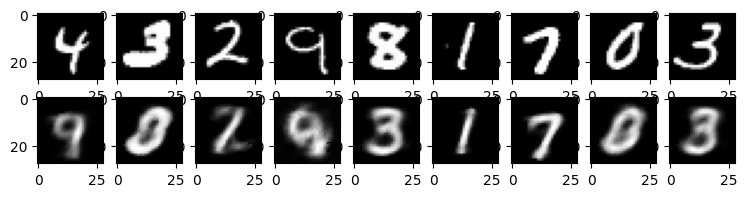

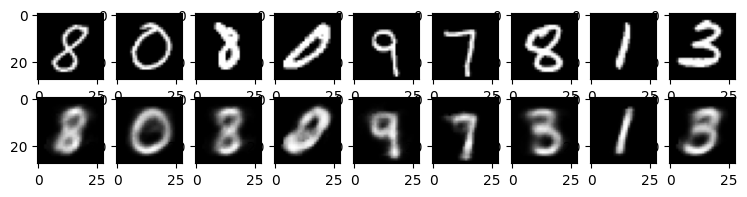

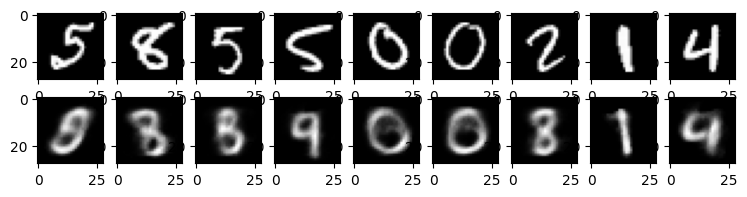

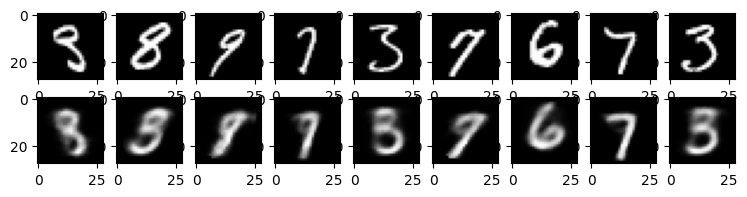

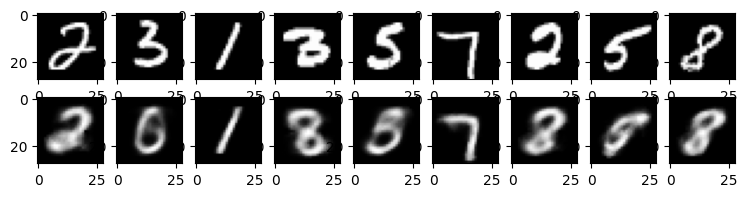

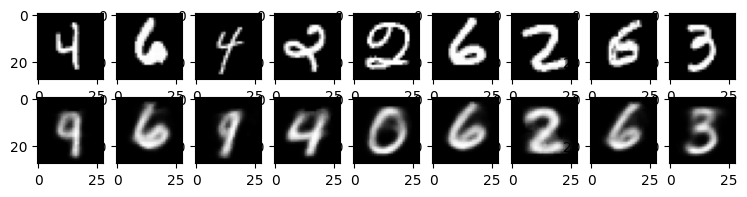

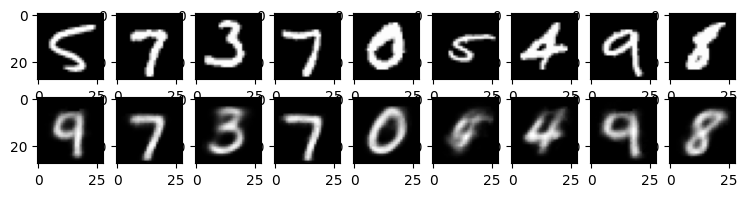

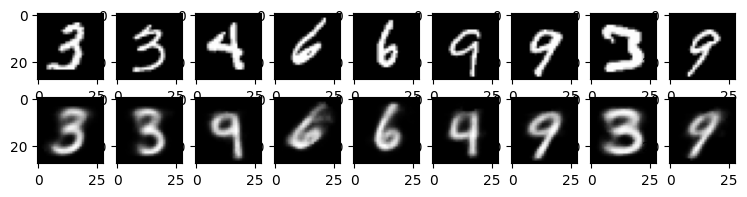

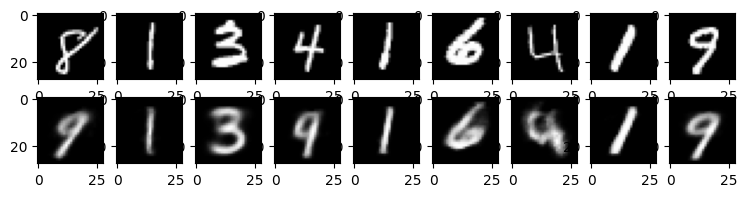

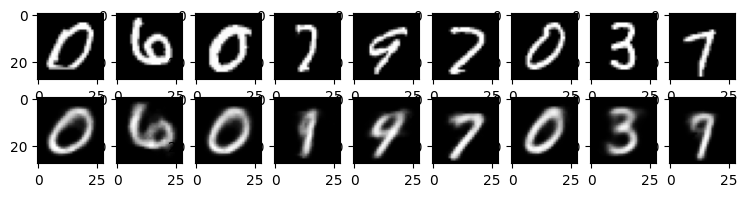

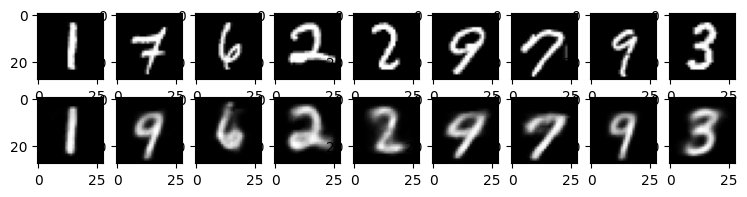

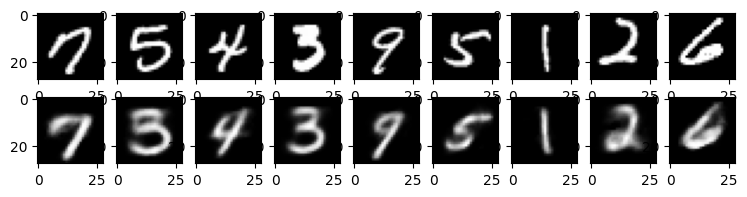

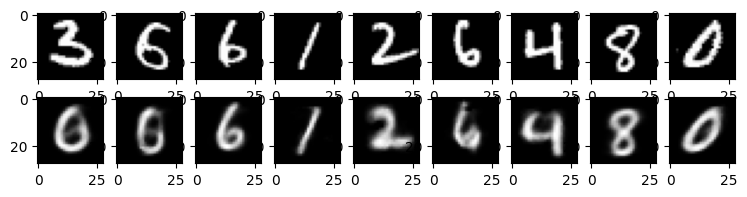

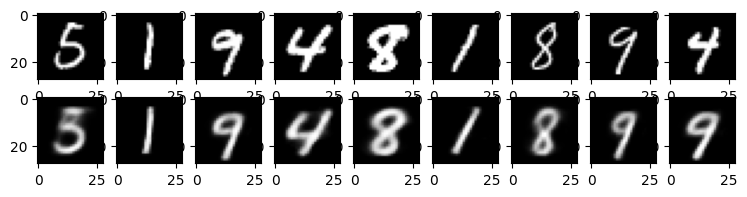

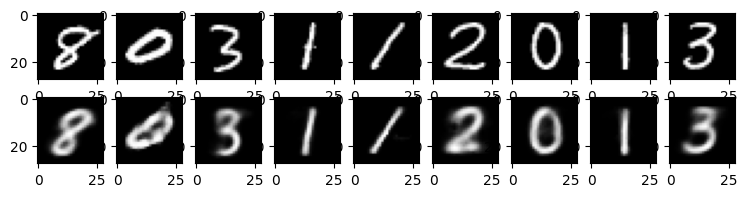

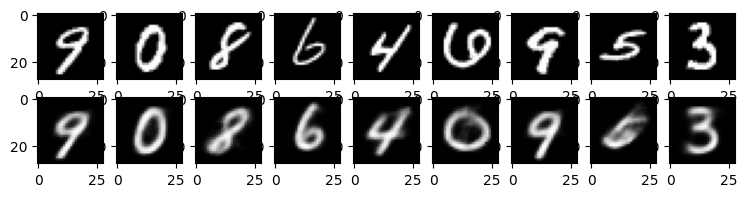

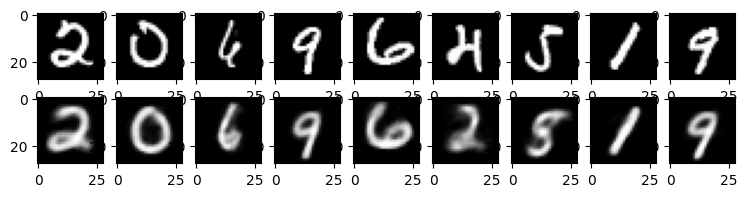

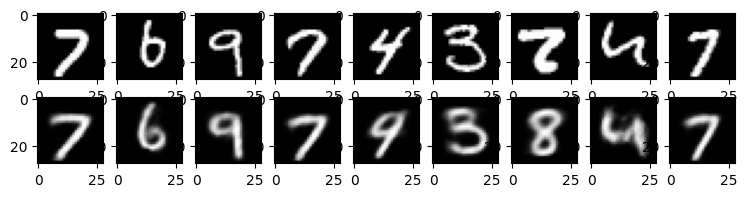

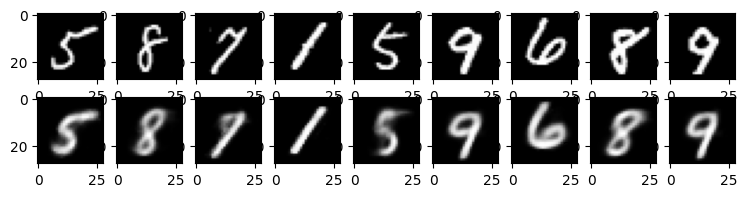

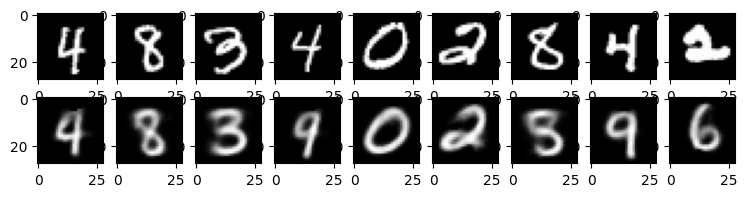

In [ ]:
for k in range(0, epochs):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28,28)
        # item: 1, 28, 28
        plt.imshow(item[0])

    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
        item = item.reshape(-1, 28,28)
        # item: 1, 28, 28
        plt.imshow(item[0])

As is visible from the images above, the output images get progressively sharper as the model is trained.
